# Customer segmentation analysis using python

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv(r"C:\Users\AJAYRAJ\Downloads\mall\Mall_Customers.csv")
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# EDA

In [3]:
x = df.drop('CustomerID', axis=1)
x.head(10)
x.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [4]:
x.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


In [5]:
x.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

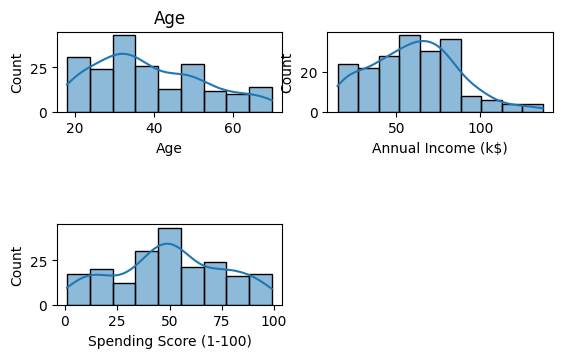

In [3]:
plt.subplot(4, 2, 1)
sns.histplot(data=df["Age"], x=df["Age"],kde=True)
plt.title("Age")
plt.subplot(4, 2, 2)
sns.histplot(data=df['Annual Income (k$)'], x=df['Annual Income (k$)'],kde=True)

plt.subplot(4, 2, 5)
sns.histplot(data=df["Spending Score (1-100)"], x=df["Spending Score (1-100)"],kde=True)


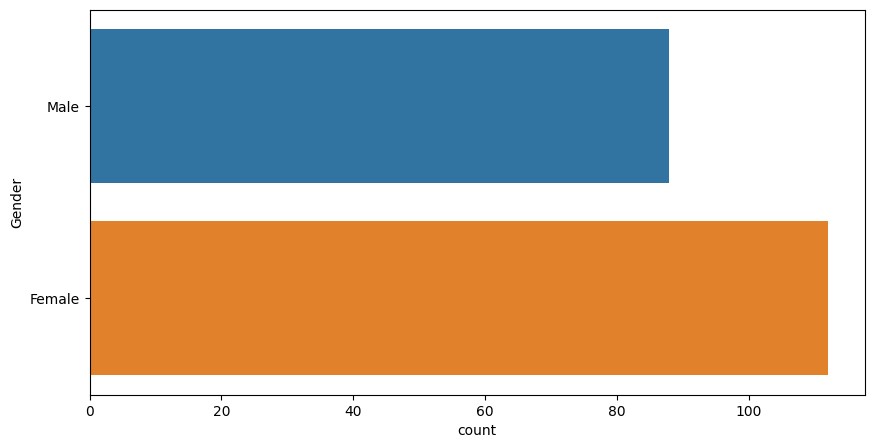

In [11]:
plt.figure(1, figsize=(10, 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

In [9]:
fig = px.scatter(data_frame=df, x ='Annual Income (k$)', y='Spending Score (1-100)', title="Relationship between Annual income and Spending score", height=400,color_discrete_sequence = px.colors.qualitative.G10[1:], color='Annual Income (k$)')
fig.show()

In [10]:
fig1 = px.scatter(data_frame=df, x='Gender', y = 'Spending Score (1-100)', title="Relationship between Gender and Annual Income(K$)", height=400, color='Gender')
fig1.show()

In [8]:
fig2 = px.scatter(data_frame=df, x = 'Age', y='Spending Score (1-100)', title="Realtionship between age and spending", height=300, color='Age')
fig2.show()

# Scaling and Clustering using KMeans

In [18]:
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]
log_data = np.log(data)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(log_data)

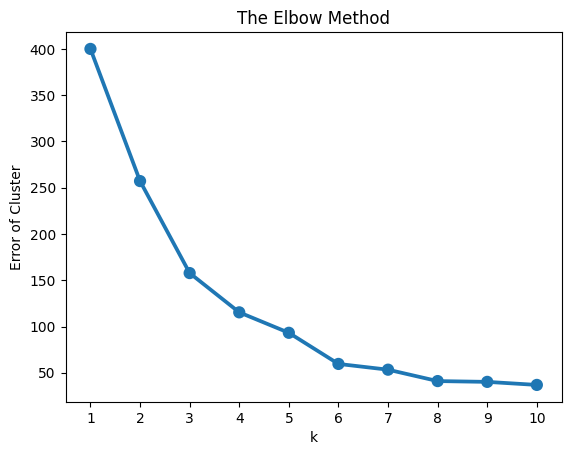

In [19]:
error = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, n_init='auto', random_state=42)
    model.fit(scaled_data)
    error.append(model.inertia_)
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('Error of Cluster')
sns.pointplot(x=list(range(1, 11)), y=error)
plt.show()

In [22]:
model = KMeans(n_clusters=6, n_init='auto', random_state=42)
model.fit(scaled_data)
data = data.assign(ClusterLabel=model.labels_)

In [23]:
data.groupby('ClusterLabel')[['Annual Income (k$)', 'Spending Score (1-100)']].median()


,Annual Income (k$),Spending Score (1-100)
ClusterLabel,,
0,80.0,83.0
1,87.0,16.0
2,22.5,9.5
3,76.5,5.0
4,23.0,73.0
5,54.0,49.0


In [24]:
fig = px.scatter(data_frame=data, x="Annual Income (k$)", y="Spending Score (1-100)", color="ClusterLabel", height=400)
fig.show()

In [9]:
data1 = df[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]
log=np.log(data1)
scale = StandardScaler()
scaled = scale.fit_transform(log)

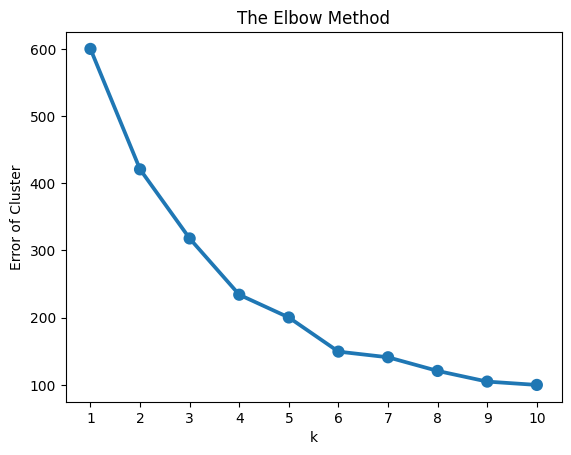

In [14]:
errors = []
for k in range(1, 11):
    model1 = KMeans(n_clusters=k, n_init='auto', random_state=42)
    model1.fit(scaled)
    errors.append(model1.inertia_)
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('Error of Cluster')
sns.pointplot(x=list(range(1, 11)), y=errors)
plt.show()

In [25]:
model1 = KMeans(n_clusters=6, n_init='auto', random_state=42)
model1.fit(scaled)
data1 = data1.assign(ClusterLabel=model1.labels_)

In [26]:
data1.groupby("ClusterLabel")[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].median()

,Age,Annual Income (k$),Spending Score (1-100)
ClusterLabel,,,
0,51.0,54.0,48.0
1,24.0,57.0,51.0
2,24.0,21.0,76.0
3,32.0,78.0,78.0
4,43.0,86.0,15.0
5,47.5,26.5,14.0


In [27]:
fig1 = px.scatter_3d(data_frame=data1, x="Age", y='Spending Score (1-100)', z='Annual Income (k$)'  ,color='ClusterLabel', height=550)
fig1.show()